In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt

In [2]:
sns.set_context('poster')

In [4]:
opd = pd.read_hdf("/data/research/results/simdata/xrays/optical_depth.hdf5",'optical_depth')

In [5]:
opd = opd[opd.view != 'native']

In [6]:
opd['log n'] = np.log10(opd['n'])
opd['log N'] = np.log10(opd['N'])
opd['log tau'] = np.log10(opd['tau'])
opd['orientation'] = 'random'
opd.orientation[opd.view == 'face (xy)'] = 'polar'
opd.orientation[opd.view == 'xz'] = 'equator'
opd.orientation[opd.view == 'yz'] = 'equator'

/home/jhummel/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jhummel/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jhummel/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


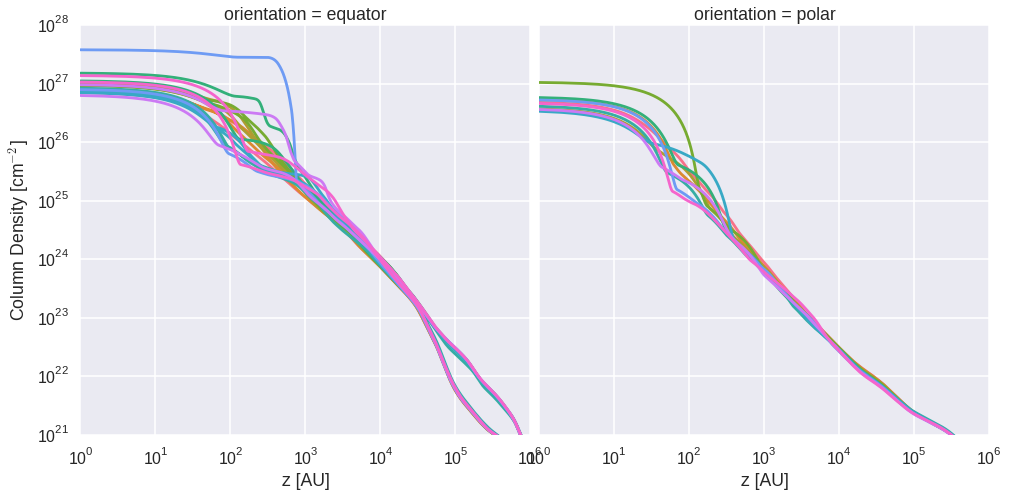

In [7]:
g = sns.FacetGrid(opd, col='orientation', hue='snapshot', size=7)
g.map(plt.loglog, 'z', 'N')
g.set(xlim=(1, 1e6), ylim=(1e21, 1e28))
g.set_xlabels("z [AU]")
g.set_ylabels('Column Density [cm$^{-2}$]')
g.fig.subplots_adjust(wspace=.02)
g.fig.savefig('figures/optical_depth/column_density.png', bbox_inches='tight')

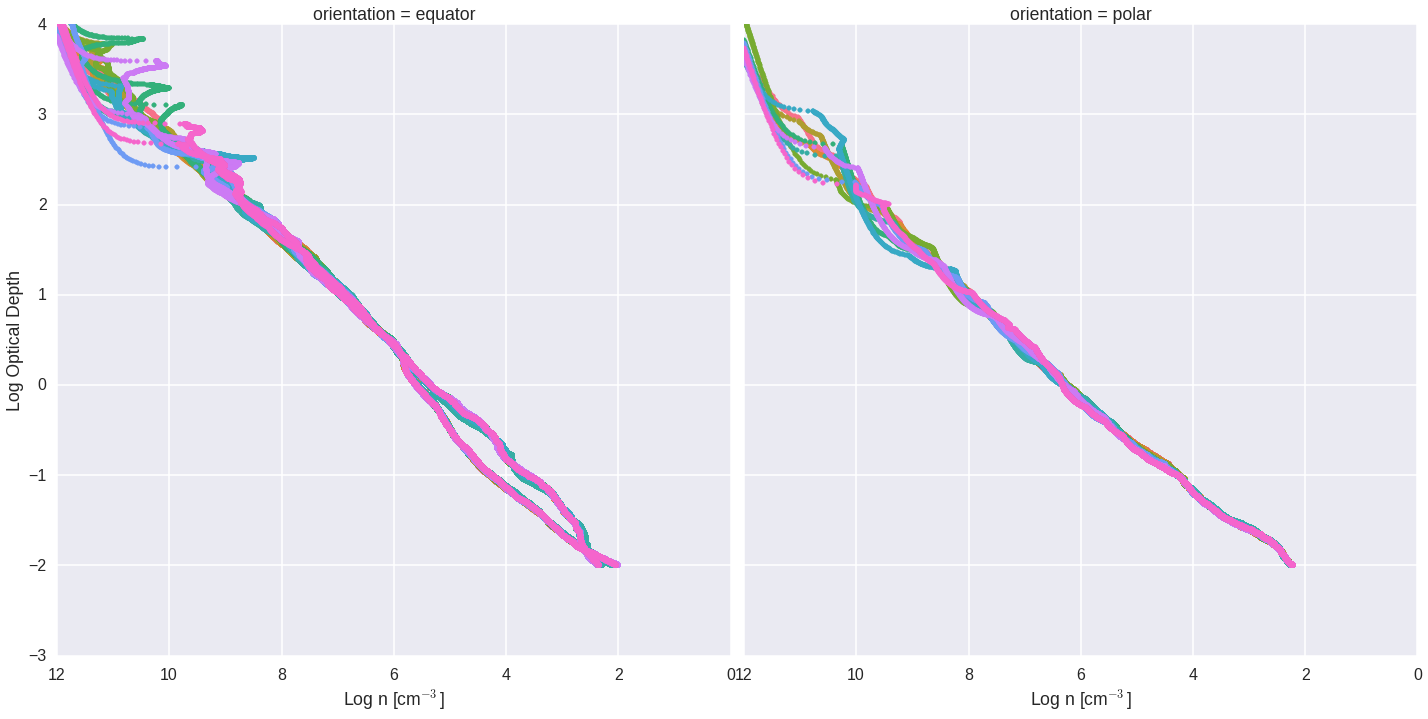

In [8]:
g = sns.FacetGrid(opd, col='orientation', hue='snapshot', size=10)
g.map(plt.scatter, 'log n', 'log tau')
g.set(xlim=(12,0), ylim=(-3,4))
g.set_xlabels('Log n [cm$^{-3}$]')
g.set_ylabels('Log Optical Depth')
g.fig.subplots_adjust(wspace=.02)
g.fig.savefig('figures/optical_depth/optical_depth_scatter.png', bbox_inches='tight')

In [9]:
op_slice = opd[opd.n > 1e4]

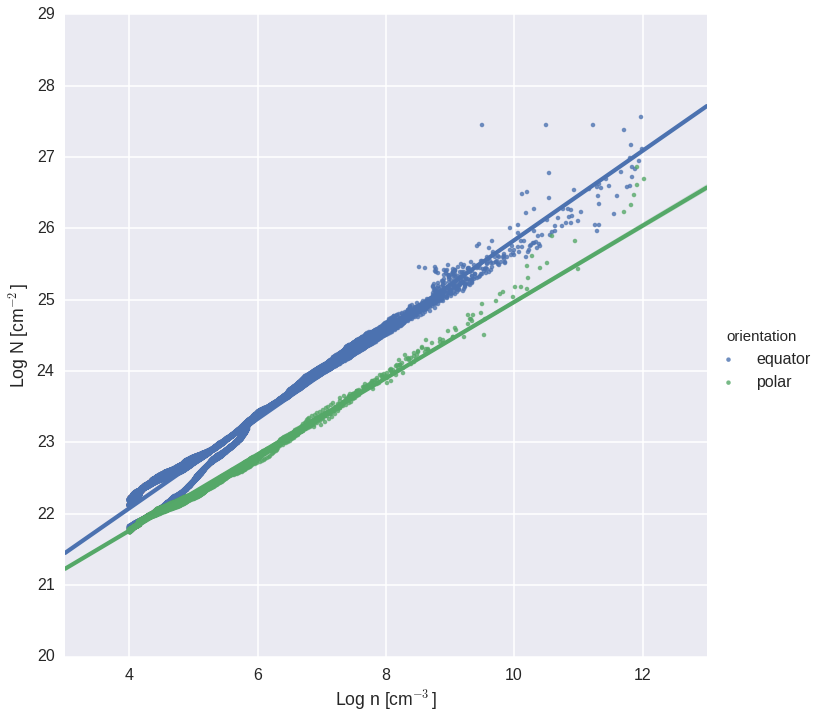

In [10]:
g = sns.lmplot("log n", "log N", hue="orientation", data=op_slice[::100], size=10)
g.set_xlabels('Log n [cm$^{-3}$]')
g.set_ylabels('Log N [cm$^{-2}$]')
g.fig.savefig('figures/optical_depth/col_density_fit.png', bbox_inches='tight')

In [11]:
op_slice['Eins'] = np.ones(( len(op_slice), ))
op_polar = op_slice[op_slice.orientation == 'polar']
op_equator = op_slice[op_slice.orientation == 'equator']

/home/jhummel/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
yp = op_polar['log N']
xp = op_polar[['log n', 'Eins']]
pmodel = sm.OLS(yp, xp)
presults = pmodel.fit()
presults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log N   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.190e+07
Date:                Tue, 03 Mar 2015   Prob (F-statistic):               0.00
Time:                        16:32:55   Log-Likelihood:             7.3343e+05
No. Observations:              442514   AIC:                        -1.467e+06
Df Residuals:                  442512   BIC:                        -1.467e+06
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
log n          0.5323   6.77e-05   7867.741      0.000         0.532     0.532
Eins          19.6366      0.000    5.8e+04      0.000        19.636    19.637
==============================================================================
Omnibus:                   335114.937   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30728484.881
Skew:                           2.976   Prob(JB):                         0.00
Kurtosis:                      43.388   Cond. No.                         25.4
==============================================================================
"""

In [13]:
ye = op_equator['log N']
xe = op_equator[['log n', 'Eins']]
emodel = sm.OLS(ye, xe)
eresults = emodel.fit()
eresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log N   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 5.462e+07
Date:                Tue, 03 Mar 2015   Prob (F-statistic):               0.00
Time:                        16:32:56   Log-Likelihood:             1.2209e+06
No. Observations:             2668221   AIC:                        -2.442e+06
Df Residuals:                 2668219   BIC:                        -2.442e+06
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
log n          0.6262   8.47e-05   7390.839      0.000         0.626     0.626
Eins          19.5735      0.000   4.38e+04      0.000        19.573    19.574
==============================================================================
Omnibus:                   318027.774   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516393.895
Skew:                          -0.840   Prob(JB):                         0.00
Kurtosis:                       4.349   Cond. No.                         26.0
==============================================================================
"""

In [14]:
print 'Polar Parameters: \n', presults.params
print 'Polar R2: ', presults.rsquared
print '\nEquatorial Parameters: \n', eresults.params
print 'Equatorial R2: ', eresults.rsquared

Polar Parameters: 
log n     0.532301
Eins     19.636552
dtype: float64
Polar R2:  0.992902076408

Equatorial Parameters: 
log n     0.626204
Eins     19.573490
dtype: float64
Equatorial R2:  0.953428308334


# Double-check the fit:

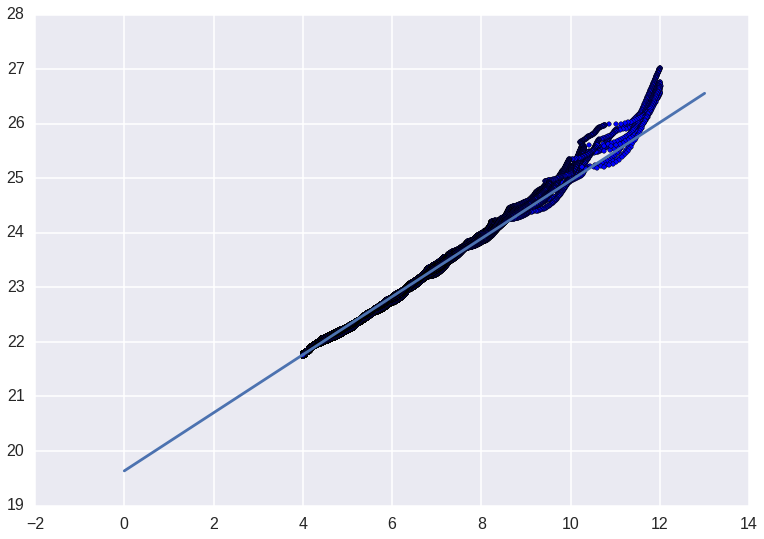

In [15]:
plt.scatter(op_polar['log n'], op_polar['log N'])
logn = np.linspace(0,13)
logN = 0.532301 * logn + 19.636552 
plt.plot(logn, logN)

#Calculate $\tau_{\rm \small effective}$ from $\tau_{\rm \small pole}$ and $\tau_{\rm \small equator}$.

###$\tau_{\rm \small effective} = \tau_{\rm \small pole} \frac{2 \Omega_{\rm \small pole}}{4\pi} + \tau_{\rm \small equator} \frac{4\pi - 2 \Omega_{\rm \small pole}}{4\pi}$

###$\Omega_{\rm \small pole} = \int_0^{2\pi}{\rm d}\phi \int_0^{\pi/4}{\rm sin}\theta \,{\rm d}\theta  = 2\pi \left( 1 - \frac{1}{\sqrt{2}} \right) \approx 2\pi \times 0.29289 = 1.840282$

#From our fit,
##$\tau_{\rm \small pole} = 10^{0.532301 {\rm log_{10}}(n) + 19.636552}$ and $\tau_{\rm \small equator} = 10^{0.626204 {\rm log_{10}}(n) + 19.573490}$

In [16]:
def tau_p(n):
    exponent = 0.532301 * np.log10(n) + 19.636552
    return 10**exponent

def tau_eq(n):
    exponent = 0.626204 * np.log10(n) + 19.573490
    return 10**exponent

In [17]:
Omega_pole = 1.840282
fourpi = 4 * np.pi
a = 2 * Omega_pole / fourpi
b = (fourpi - 2*Omega_pole)/fourpi
def tau_eff(n):
    x = tau_p(n)
    y = tau_eq(n)
    return a*x + b*y

### Let's check the results:

In [18]:
Omega_pole, 4*np.pi

(1.840282, 12.566370614359172)

In [19]:
a,b

(0.2928899769830393, 0.7071100230169606)

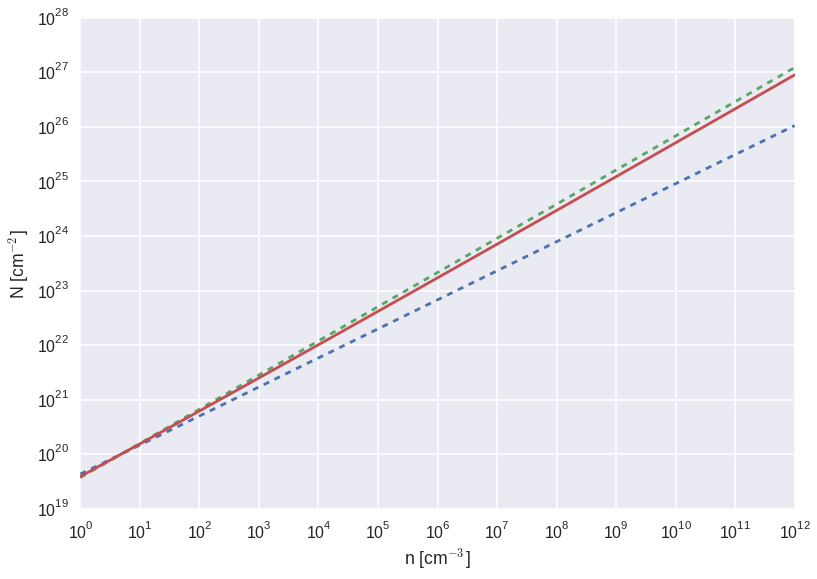

In [20]:
n = np.logspace(0,12)
plt.loglog(n, tau_p(n), '--')
plt.loglog(n, tau_eq(n), '--')
plt.loglog(n, tau_eff(n))
plt.xlabel('n [cm$^{-3}$]')
plt.ylabel('N [cm$^{-2}$]')

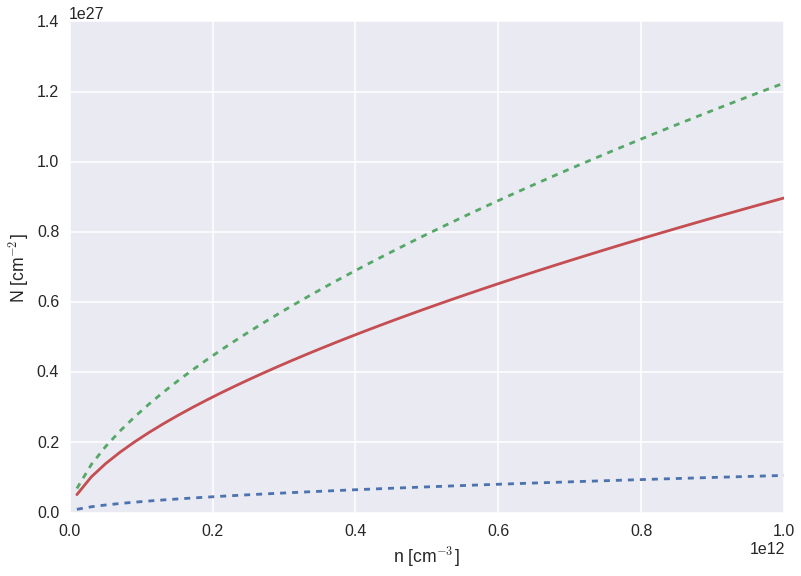

In [21]:
n = np.linspace(1e10,1e12)
plt.plot(n, tau_p(n), '--')
plt.plot(n, tau_eq(n), '--')
plt.plot(n, tau_eff(n))
plt.xlabel('n [cm$^{-3}$]')
plt.ylabel('N [cm$^{-2}$]')

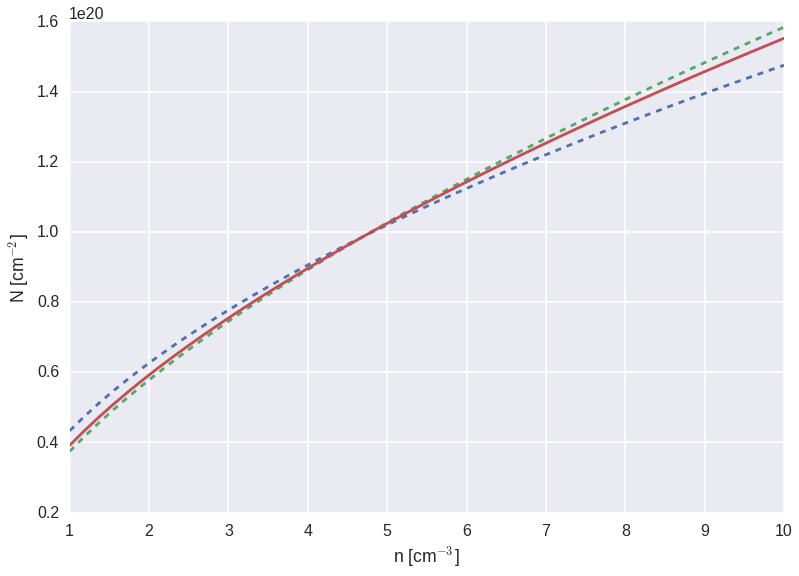

In [22]:
n = np.linspace(1,10)
plt.plot(n, tau_p(n), '--')
plt.plot(n, tau_eq(n), '--')
plt.plot(n, tau_eff(n))
plt.xlabel('n [cm$^{-3}$]')
plt.ylabel('N [cm$^{-2}$]')